In [1]:
import numpy as np 
import pandas as pd
import csv 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt


REQ 1 Data preparration
 Prepare a training and a validation set using the feature extraction procedure code attached to the list. If you intend to use Weka, it is recommended to perform a one-time data
conversion and an export to one of the compatible formats.

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import csv

# Load data
data = pd.read_csv("jester_ratings.csv")
data2 = pd.read_csv("jester_items.csv")



c:\Users\brkyb\AppData\Local\Programs\Python\Python38\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [3]:
# Extract columns
jokes=data2["jokeText"]
userid=data["userId"]
jid=data["jokeId"]
rat=data['rating']

# Encode jokes
from sentence_transformers import SentenceTransformer 
model = SentenceTransformer('bert-base-cased') # takes text of each joke and converts into vector numbers to capture meaniing
jokesembed=[0]
for i in jokes:
    
    embeddings = model.encode(i) #convert text to numerical vector  /in a continious vector space

    embeddings.shape # text vector of fixed size for bert-base-cased
    jokesembed.append(embeddings)
# Prepare the header dataset
header  =["usserid","jokeid","rating"]

#generate headers for embedding(numerical) dimensions in dataset for numerical representations / cx
for i in range(0,768):#base
   header.append("embed"+str(i))

with open('dataset.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)

    # Iterate over the data and write rows based on the condition
    for i, j, k in zip(userid, jid, rat):
        if j > 100 or i > 25000:
            continue
            
        else:
            
       
            jo=jokesembed[j]
            jo=list(jo)
            jo.insert(0,i)
            jo.insert(1,j)
            jo.insert(2,k)
            
            
                
            
                        
            writer.writerow(jo) # write to csv file 
            
            
            


No sentence-transformers model found with name bert-base-cased. Creating a new one with mean pooling.
c:\Users\brkyb\AppData\Local\Programs\Python\Python38\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


REQ2:Test the operation of the basic MLP model with the default configuration of hyperparameters by training it on data from the Jester set. Trace the behavior of the model over
time by visualizing the value of the cost function as a function of the number of epochs,
paying attention to the values for the training set and the validation set.

In [4]:
maindata=pd.read_csv("dataset.csv")

In [11]:
#control under or overfit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

x2 = maindata.drop(["jokeid", "rating", "usserid"], axis=1) # to predictions
y2 = maindata['rating'] # target to predict

x_train, x_val, y_train, y_val = train_test_split(x2, y2, test_size=0.3, random_state=100)#ensures random number generator used in deterministic way. so data split will be same every time i run
#val set to eval performance of trained model
x_train2 = normalize(x_train)#ensure each feature similar scale that influences model training. convergence in tr
#x_val = normalize(x_val)


In [12]:
x_train

,embed0,embed1,embed2,embed3,embed4,embed5,embed6,embed7,embed8,embed9,...,embed758,embed759,embed760,embed761,embed762,embed763,embed764,embed765,embed766,embed767
164886,0.218874,0.046705,0.152458,-0.021977,0.348338,-0.050815,0.079182,0.110423,0.112983,-0.161124,...,0.114567,0.124181,-0.093300,-0.103338,-0.214950,-0.027260,-0.078404,0.365250,0.012369,-0.000644
241404,0.153519,-0.097615,-0.117435,0.398964,0.347743,0.078421,0.187930,0.052553,-0.079170,-0.015361,...,0.078058,0.017024,-0.289091,-0.179924,0.040600,0.066960,0.032505,0.063400,0.073823,-0.014593
414247,0.011066,0.088271,-0.283105,0.386502,0.158762,0.129227,0.216247,0.195754,-0.229711,-0.218177,...,-0.060157,0.014704,-0.131317,-0.024354,0.153424,-0.029642,0.164492,0.349762,-0.045877,-0.068567
304360,0.059359,-0.016224,-0.035630,0.210403,0.367061,0.177344,0.046930,0.166728,0.106397,0.106057,...,0.136504,0.152354,-0.205869,-0.166688,0.059528,-0.103671,0.023173,0.385836,0.066113,-0.035589
221553,0.349687,-0.022975,-0.112311,0.168969,0.252325,-0.010374,0.286809,0.200121,0.060994,-0.416268,...,-0.016499,0.256895,-0.084112,-0.088730,0.151828,0.064451,-0.104687,0.211798,-0.003804,-0.008454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339799,0.132774,-0.021863,0.038439,0.171582,0.426158,0.146410,-0.031422,0.034088,0.038804,-0.266857,...,0.253479,0.064479,-0.198822,-0.139228,0.076311,-0.025586,0.054745,0.144893,0.021228,0.120545
253799,0.059359,-0.016224,-0.035630,0.210403,0.367061,0.177344,0.046930,0.166728,0.106397,0.106057,...,0.136504,0.152354,-0.205869,-0.166688,0.059528,-0.103671,0.023173,0.385836,0.066113,-0.035589
210755,0.012987,-0.098507,0.156341,0.223130,0.348078,0.055282,0.014695,0.052303,-0.065610,-0.052072,...,0.067485,0.008565,-0.017383,-0.359694,-0.034318,-0.177207,0.108085,0.169590,-0.003230,-0.026542
56088,0.061725,0.002768,-0.220825,0.415110,0.307918,0.001223,-0.031612,0.146812,0.007272,-0.121870,...,-0.010143,0.035056,-0.111344,-0.301073,0.028496,0.091200,0.332698,0.311988,-0.001891,0.024252


Validation MSE: 28.005312488136276


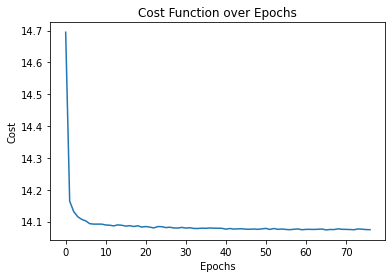

In [10]:
#epoch: number of times the training dataset passed through model.
#cost(y): value of the loss function
from sklearn.neural_network import MLPRegressor#designed for regression tasks. it learns to predict values
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = MLPRegressor(hidden_layer_sizes=(128, 128), solver="sgd", alpha=0.001)#each2 hidden layer hypermarameter that affect model capacity to learn complex patterns from data
#solver: optimization technique to minimize loss function
#alpha: help prevent overfitting


model.fit(x_train, y_train)# train and evaluate performance xval yval

# Predict and evaluate performance of trained model on validation set.
y_pred = model.predict(x_val) # xval to predict outcomes
mse = mean_squared_error(y_val, y_pred)#provide measure of how well the model predictions ypred match actual outcomes observed in test data
print(f'Validation MSE: {mse}')# used to evauate performance of  of model. measure average squared difference netween predicted values and actual values


# when Plot cost function
plt.plot()
plt.plot(model.loss_curve_, label = ) #x axis: represent epochs each loss corresponds
#y axis: how well model predictions match the actual target values
plt.title("Cost Function over Epochs")
plt.xlabel("Epochs")#continue training till converges
plt.ylabel("Cost")
plt.show()



REQ3 Investigate the effect of learning rate on performance: repeat learning for 3 different parameter values.

Learning Rate: 0.0001, Validation MSE: 28.031345344745173
Learning Rate: 0.001, Validation MSE: 27.997557659853744
Learning Rate: 0.01, Validation MSE: 28.056327799572127


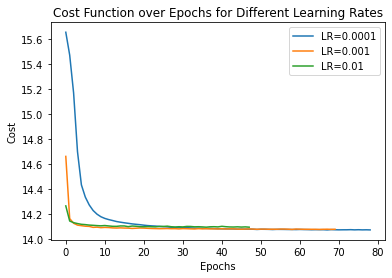

In [7]:
learning_rates = [0.0001, 0.001, 0.01]
histories = []

for lr in learning_rates:
    model = MLPRegressor(hidden_layer_sizes=(128, 128), solver="sgd", alpha=0.001, learning_rate_init=lr, max_iter=200)#optimizer during training
    model.fit(x_train, y_train)
    histories.append(model.loss_curve_)
    y_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f'Learning Rate: {lr}, Validation MSE: {mse}')

# Plot cost functions
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i], label=f'LR={lr}')
plt.title("Cost Function over Epochs for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()
